In [1]:
#collecting and loading data
import pandas as pd
import numpy as np

def read_data(file_name):
    df = pd.read_excel(file_name)
    df = df.fillna(df.mean(numeric_only=True))  # Fill missing values with column mean for numeric columns
    df = df.iloc[:, 4:10]  # Select columns 4 to 9
    return df

df = read_data('ml-data.xlsx')

print(df.head())

   Header_and_Main_Declaration  Incomprehensible_Code  \
0                            2                    2.0   
1                            2                    2.0   
2                            2                    2.0   
3                            2                    1.0   
4                            2                    2.0   

   Comprehensible_Code_with_logical_errors  \
0                                        2   
1                                        2   
2                                        1   
3                                        1   
4                                        1   

   Comprehensible_code_with_syntax_errors  Correct_code_and_output  \
0                                     2.0                        2   
1                                     2.0                        0   
2                                     1.0                        1   
3                                     1.0                        0   
4                             

In [2]:
'''
A1. Write your own functions for the following modules:
a) Summation unit
b) Activation Unit – Step, Bipolar Step, Sigmoid, TanH, ReLU and Leaky ReLU functions
c) Comparator unit for Error calculation

'''


import pandas as pd
import numpy as np
import math

# Custom Functions

def summation_unit(inputs, weights, bias=0):
    """
    Calculates the weighted sum of inputs plus bias.
    """
    return sum(i * w for i, w in zip(inputs, weights)) + bias

def sigmoid_function(x):
    """
    Sigmoid activation function.
    """
    return 1 / (1 + np.exp(-x))

def relu_function(x):
    """
    ReLU activation function.
    """
    return max(0, x)

def mean_squared_error(predicted, actual):
    """
    Calculates the Mean Squared Error between predicted and actual values.
    """
    return np.mean((np.array(predicted) - np.array(actual)) ** 2)

# Bi-Polar Step Activation Function
def bipolar_step_activation(weighted_sum):
    """
    Bi-Polar step activation function.
    Returns 1 if weighted_sum >= 0, otherwise -1.
    """
    return 1 if weighted_sum >= 0 else -1

# Sigmoid Activation Function
def sigmoid_activation(weighted_sum):
    """
    Implements the sigmoid activation function.
    Returns a value between 0 and 1.
    """
    return 1 / (1 + np.exp(-weighted_sum))




# Comparator Unit for Error Calculation
def errorCalculator(predicted, actual):
    return actual - predicted

Convergence achieved at epoch 130 with error 0


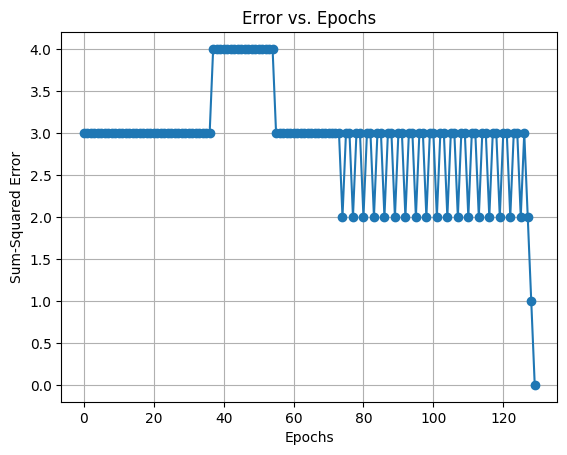

Final Weights: [-0.1   0.1   0.05]


In [3]:
'''
Develop the above perceptron in your own code (don’t use the perceptron model available from
package). Use the initial weights as provided below.
W0 = 10, W1 = 0.2, w2 = -0.75, learning rate (α) = 0.05
Write a function for Activation function. Develop & Use the code for Step activation function to learn
the weights of the network to implement above provided AND gate logic. The activation function is
demonstrated below.
Identify the number of epochs needed for the weights to converge in the learning process. Make a
plot of the epochs against the error values calculated (after each epoch, calculate the sum-squareerror against all training samples).

'''


import numpy as np
import matplotlib.pyplot as plt

# Step Activation Function
def step_activation(weighted_sum):
    """
    Implements the step activation function.
    Returns 1 if weighted_sum >= 0, otherwise 0.
    """
    return 1 if weighted_sum >= 0 else 0

# Perceptron Model
def perceptron(X, y, epochs=1000, learning_rate=0.05, error_threshold=0.002):
    # Initialize weights with provided values
    weights = np.array([10, 0.2, -0.75])
    bias = 1  # W0 is treated as bias
    errors = []  # To store the sum of squared errors for each epoch

    # Training process
    for epoch in range(epochs):
        sum_squared_error = 0

        for i in range(len(X)):
            # Insert the bias term as X0 = 1
            inputs = np.insert(X[i], 0, bias)

            # Weighted sum (dot product of inputs and weights)
            weighted_sum = np.dot(inputs, weights)

            # Apply the step activation function
            prediction = step_activation(weighted_sum)

            # Calculate the error (target - prediction)
            error = y[i] - prediction

            # Update the weights using the perceptron learning rule
            weights += learning_rate * error * inputs

            # Accumulate the sum of squared error
            sum_squared_error += error**2

        # Store the sum squared error for this epoch
        errors.append(sum_squared_error)

        # Check for convergence (error threshold)
        if sum_squared_error <= error_threshold:
            print(f"Convergence achieved at epoch {epoch + 1} with error {sum_squared_error}")
            break
    else:
        print(f"Training stopped after {epochs} epochs with final error {sum_squared_error}")

    return weights, errors

# AND gate inputs and outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs for AND gate
y = np.array([0, 0, 0, 1])  # Expected outputs (AND gate logic)

# Run the perceptron
final_weights, error_values = perceptron(X, y)

# Plotting error vs. epochs
epochs = len(error_values)
plt.plot(range(epochs), error_values, marker='o')
plt.title('Error vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.grid(True)
plt.show()

# Output final weights
print(f"Final Weights: {final_weights}")


In [4]:
import math

# Bi-Polar Step function
def bipolar_step_function(x):
    return 1 if x > 0 else -1

def train_perceptron_bipolar(inputs, outputs, W0, W1, W2, learning_rate, max_epochs=1000, convergence_threshold=0.002):
    epochs = 0
    while epochs < max_epochs:
        total_error = 0
        for i, (x1, x2) in enumerate(inputs):
            net_input = W0 + W1 * x1 + W2 * x2
            output = bipolar_step_function(net_input)
            error = outputs[i] - output
            total_error += error ** 2
            # Update weights
            W0 += learning_rate * error
            W1 += learning_rate * error * x1
            W2 += learning_rate * error * x2

        # Check for convergence
        if total_error <= convergence_threshold:
            break
        epochs += 1
    return W0, W1, W2, epochs

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def train_perceptron_sigmoid(inputs, outputs, W0, W1, W2, learning_rate, max_epochs=1000, convergence_threshold=0.002):
    epochs = 0
    while epochs < max_epochs:
        total_error = 0
        for i, (x1, x2) in enumerate(inputs):
            net_input = W0 + W1 * x1 + W2 * x2
            output = sigmoid(net_input)
            error = outputs[i] - output
            total_error += error ** 2
            # Update weights
            W0 += learning_rate * error
            W1 += learning_rate * error * x1
            W2 += learning_rate * error * x2

        # Check for convergence
        if total_error <= convergence_threshold:
            break
        epochs += 1
    return W0, W1, W2, epochs

# ReLU function
def relu(x):
    return max(0, x)

def train_perceptron_relu(inputs, outputs, W0, W1, W2, learning_rate, max_epochs=1000, convergence_threshold=0.002):
    epochs = 0
    while epochs < max_epochs:
        total_error = 0
        for i, (x1, x2) in enumerate(inputs):
            net_input = W0 + W1 * x1 + W2 * x2
            output = relu(net_input)
            error = outputs[i] - output
            total_error += error ** 2
            # Update weights
            W0 += learning_rate * error
            W1 += learning_rate * error * x1
            W2 += learning_rate * error * x2

        # Check for convergence
        if total_error <= convergence_threshold:
            break
        epochs += 1
    return W0, W1, W2, epochs

# Input and output data for AND gate
inputs_bipolar = [(0, 0), (0, 1), (1, 0), (1, 1)]
outputs_bipolar = [-1, -1, -1, 1]  # Bipolar for AND gate

inputs_sigmoid = [(0, 0), (0, 1), (1, 0), (1, 1)]
outputs_sigmoid = [0, 0, 0, 1]  # Sigmoid for AND gate

inputs_relu = [(0, 0), (0, 1), (1, 0), (1, 1)]
outputs_relu = [0, 0, 0, 1]  # ReLU for AND gate

# Initial weights and learning rate
W0, W1, W2 = 10, 0.2, -0.75
learning_rate = 0.05

# Train the Perceptron using different activation functions
final_W0_bipolar, final_W1_bipolar, final_W2_bipolar, epochs_bipolar = train_perceptron_bipolar(
    inputs_bipolar, outputs_bipolar, W0, W1, W2, learning_rate)
print(f"Bi-Polar Step Function converged in {epochs_bipolar} epochs")

final_W0_sigmoid, final_W1_sigmoid, final_W2_sigmoid, epochs_sigmoid = train_perceptron_sigmoid(
    inputs_sigmoid, outputs_sigmoid, W0, W1, W2, learning_rate)
print(f"Sigmoid Function converged in {epochs_sigmoid} epochs")

final_W0_relu, final_W1_relu, final_W2_relu, epochs_relu = train_perceptron_relu(
    inputs_relu, outputs_relu, W0, W1, W2, learning_rate)
print(f"ReLU Function converged in {epochs_relu} epochs")

# Print comparison of epochs required for convergence
print(f"\nComparison of Epochs:")
print(f"Bi-Polar Step Function: {epochs_bipolar} epochs")
print(f"Sigmoid Function: {epochs_sigmoid} epochs")
print(f"ReLU Function: {epochs_relu} epochs")


Bi-Polar Step Function converged in 67 epochs
Sigmoid Function converged in 1000 epochs
ReLU Function converged in 389 epochs

Comparison of Epochs:
Bi-Polar Step Function: 67 epochs
Sigmoid Function: 1000 epochs
ReLU Function: 389 epochs


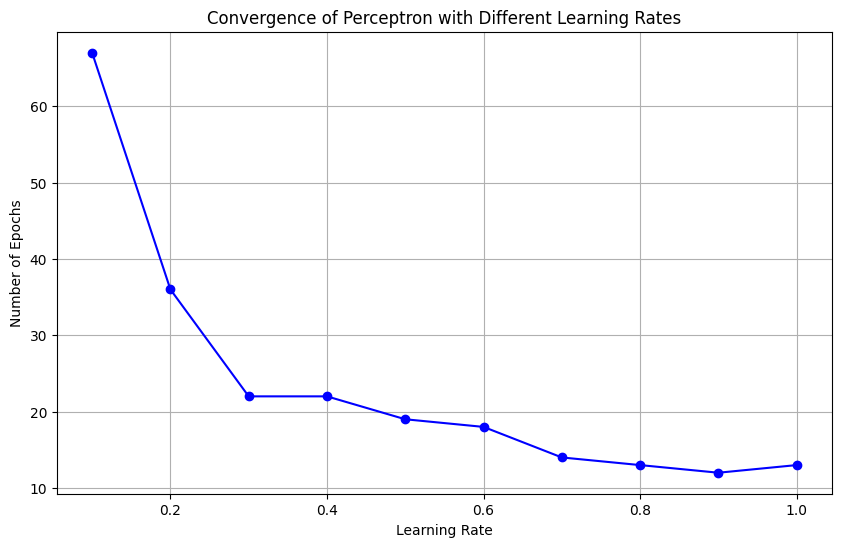

In [5]:
#A-4

import matplotlib.pyplot as plt

# Step activation function
def step_function(x):
    return 1 if x > 0 else 0

def train_perceptron_step(inputs, outputs, W0, W1, W2, learning_rate, max_epochs=1000, convergence_threshold=0.002):
    epochs = 0
    while epochs < max_epochs:
        total_error = 0
        for i, (x1, x2) in enumerate(inputs):
            net_input = W0 + W1 * x1 + W2 * x2
            output = step_function(net_input)
            error = outputs[i] - output
            total_error += error ** 2
            # Update weights
            W0 += learning_rate * error
            W1 += learning_rate * error * x1
            W2 += learning_rate * error * x2

        # Check for convergence
        if total_error <= convergence_threshold:
            break
        epochs += 1
    return epochs

# Input and output data for AND gate
inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
outputs = [0, 0, 0, 1]  # Step function for AND gate

# Initial weights and list of learning rates to test
W0, W1, W2 = 10, 0.2, -0.75
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
epochs_list = []

# Train the perceptron with different learning rates and record epochs
for lr in learning_rates:
    epochs = train_perceptron_step(inputs, outputs, W0, W1, W2, lr)
    epochs_list.append(epochs)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, epochs_list, marker='o', linestyle='-', color='b')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Epochs')
plt.title('Convergence of Perceptron with Different Learning Rates')
plt.grid(True)
plt.show()


Final Weights for XOR Gate: [0.09999999999999236, -0.09999999999999969, -0.09999999999999969]
Total Epochs for XOR Gate: 1000


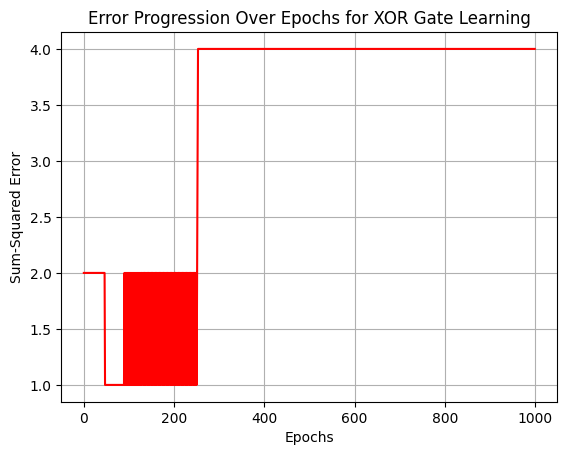

In [6]:
#A6

# Perceptron learning function
def perceptronXorGate(inputs, initialWeights, learningRate, maxEpochs=1000, convergenceError=0.002):
    weights = initialWeights[:]  # Copy initial weights
    epoch = 0
    converged = False
    errorProgression = []

    while not converged and epoch < maxEpochs:
        totalError = 0
        for inputPair, target in inputs:
            # Calculate weighted sum + bias
            summation = summation_unit(weights, [1] + inputPair)  # Adding bias as input 1
            # Apply step activation function
            output = step_activation(summation)
            # Calculate error
            error = errorCalculator(output, target)
            totalError += error ** 2  # Sum-squared error

            # Update weights
            for i in range(len(weights)):
                weights[i] += learningRate * error * ([1] + inputPair)[i]

        errorProgression.append(totalError)
        if totalError <= convergenceError:
            converged = True
        epoch += 1

    return weights, errorProgression, epoch

# Initial weights and inputs for XOR gate
initialWeights = [10, 0.2, -0.75]
xorGateInputs = [([0, 0], 0), ([0, 1], 1), ([1, 0], 1), ([1, 1], 0)]

# Learning rate for A1
learningRate = 0.05

# Train perceptron for XOR gate
finalWeights, errorProgression, totalEpochs = perceptronXorGate(xorGateInputs, initialWeights, learningRate)

print("Final Weights for XOR Gate:", finalWeights)
print("Total Epochs for XOR Gate:", totalEpochs)

plt.plot(range(totalEpochs), errorProgression, linestyle='-', color='r')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Error Progression Over Epochs for XOR Gate Learning')
plt.grid(True)
plt.show()

Activation Function: Bi-Polar Step
Final Weights: [0.1999999999999919, -0.09999999999999969, -0.15000000000000013]
Total Epochs: 1000


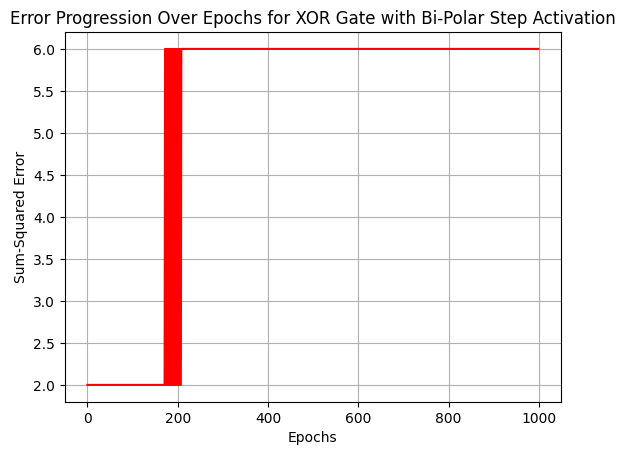

Activation Function: Sigmoid
Final Weights: [0.09999999999999236, -0.09999999999999969, -0.09999999999999969]
Total Epochs: 1000


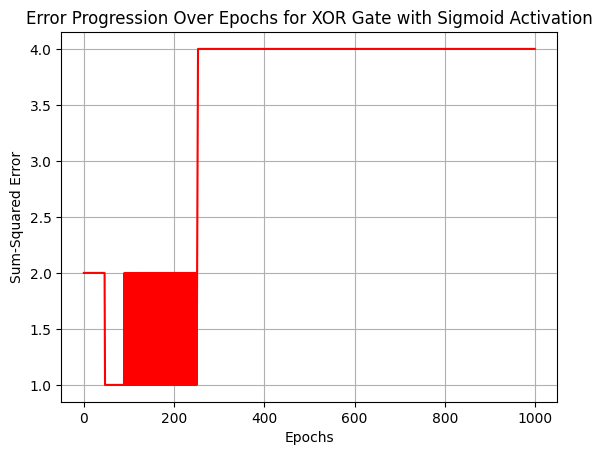

Activation Function: ReLU
Final Weights: [0.09999999999999236, -0.09999999999999969, -0.09999999999999969]
Total Epochs: 1000


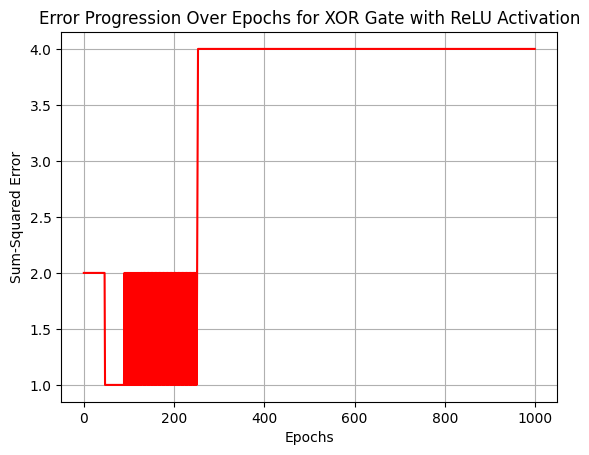

In [7]:
# Modified Perceptron for Different Activation Functions
def perceptronWithActivation(inputs, initialWeights, learningRate, activationFunction, maxEpochs=1000, convergenceError=0.002):
    weights = initialWeights[:]
    epoch = 0
    converged = False
    errorProgression = []

    while not converged and epoch < maxEpochs:
        totalError = 0
        for inputPair, target in inputs:
            # Calculate weighted sum + bias
            summation = summation_unit(weights, [1] + inputPair)
            # Apply the specified activation function
            output = activationFunction(summation)
            # For non-binary output (like sigmoid), we use thresholding to calculate binary error
            if activationFunction == sigmoid:
                output = 1 if output >= 0.5 else 0
            elif activationFunction == relu_function:
                output = 1 if output > 0 else 0
            # Calculate error
            error = errorCalculator(output, target)
            totalError += error ** 2

            # Update weights
            for i in range(len(weights)):
                weights[i] += learningRate * error * ([1] + inputPair)[i]

        errorProgression.append(totalError)
        if totalError <= convergenceError:
            converged = True
        epoch += 1

    return weights, errorProgression, epoch

# XOR gate inputs and initial weights
xorGateInputs = [([0, 0], 0), ([0, 1], 1), ([1, 0], 1), ([1, 1], 0)]
initialWeights = [10, 0.2, -0.75]
learningRate = 0.05

# Activation Functions to Test
activationFunctions = [bipolar_step_function, sigmoid, relu_function]
activationFunctionNames = ["Bi-Polar Step", "Sigmoid", "ReLU"]

# Train perceptron for each activation function
for activationFunction, name in zip(activationFunctions, activationFunctionNames):
    finalWeights, errorProgression, totalEpochs = perceptronWithActivation(xorGateInputs, initialWeights, learningRate, activationFunction)

    print(f"Activation Function: {name}")
    print("Final Weights:", finalWeights)
    print("Total Epochs:", totalEpochs)

    plt.figure()
    plt.plot(range(len(errorProgression)), errorProgression, linestyle='-', color='r')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Squared Error')
    plt.title(f'Error Progression Over Epochs for XOR Gate with {name} Activation')
    plt.grid(True)
    plt.show()

In [8]:
'''A6. Use customer data provided below. Build a perceptron & learn to classify the transactions as
high or low value as provided in the below table. Use sigmoid as the activation function. Initialize the
weights & learning rate with your choice. '''
import numpy as np

# Data for the customers
data = np.array([
    [20, 6, 2, 386],  # C_1
    [16, 3, 6, 289],  # C_2
    [27, 6, 2, 393],  # C_3
    [19, 1, 2, 110],  # C_4
    [24, 4, 2, 280],  # C_5
    [22, 1, 5, 167],  # C_6
    [15, 4, 2, 271],  # C_7
    [18, 4, 2, 274],  # C_8
    [21, 1, 4, 148],  # C_9
    [16, 2, 4, 198],  # C_10
])

# Labels (1 for High Value, 0 for Low Value)
labels = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Training the perceptron using the sigmoid activation function
def train_perceptron(X, y, learning_rate=0.1, epochs=1000):
    np.random.seed(1)
    weights = np.random.rand(X.shape[1])
    bias = np.random.rand(1)

    for epoch in range(epochs):
        for i in range(X.shape[0]):
            linear_output = np.dot(X[i], weights) + bias
            prediction = sigmoid(linear_output)

            # Calculate the error
            error = y[i] - prediction

            # Update weights and bias
            weights += learning_rate * error * sigmoid_derivative(linear_output) * X[i]
            bias += learning_rate * error * sigmoid_derivative(linear_output)

        # Optional: You can track the loss here if needed
        if epoch % 100 == 0:
            loss = np.mean(np.square(y - sigmoid(np.dot(X, weights) + bias)))
            print(f'Epoch {epoch}, Loss: {loss}')

    return weights, bias

# Train the perceptron
weights, bias = train_perceptron(data, labels, learning_rate=0.1, epochs=1000)

# Function to predict new data
def predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return sigmoid(linear_output) >= 0.5  # Returns True for high value, False for low value

# Test the model on the training data
predictions = predict(data, weights, bias)
print("Predictions:", predictions)
print("Actual:", labels)


Epoch 0, Loss: 0.4
Epoch 100, Loss: 0.4
Epoch 200, Loss: 0.4
Epoch 300, Loss: 0.4
Epoch 400, Loss: 0.4
Epoch 500, Loss: 0.4
Epoch 600, Loss: 0.4
Epoch 700, Loss: 0.4
Epoch 800, Loss: 0.4
Epoch 900, Loss: 0.4
Predictions: [ True  True  True  True  True  True  True  True  True  True]
Actual: [1 1 1 0 1 0 1 1 0 0]


In [9]:
'''A7. Compare the results obtained from above perceptron learning to the ones obtained with matrix
pseudo-inverse.'''
import numpy as np

# Data for the customers (as before)
data = np.array([
    [20, 6, 2, 386],  # C_1
    [16, 3, 6, 289],  # C_2
    [27, 6, 2, 393],  # C_3
    [19, 1, 2, 110],  # C_4
    [24, 4, 2, 280],  # C_5
    [22, 1, 5, 167],  # C_6
    [15, 4, 2, 271],  # C_7
    [18, 4, 2, 274],  # C_8
    [21, 1, 4, 148],  # C_9
    [16, 2, 4, 198],  # C_10
])

# Labels (1 for High Value, 0 for Low Value)
labels = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Append a column of ones to the data for the bias term
X = np.hstack((np.ones((data.shape[0], 1)), data))

# Compute the pseudo-inverse
pseudo_inverse = np.linalg.pinv(X)

# Calculate weights using pseudo-inverse
weights_pseudo_inverse = np.dot(pseudo_inverse, labels)

# Function to predict new data using pseudo-inverse weights
def predict_pseudo_inverse(X, weights):
    return np.dot(X, weights) >= 0.5  # Returns True for high value, False for low value

# Test the model on the training data using pseudo-inverse
predictions_pseudo_inverse = predict_pseudo_inverse(X, weights_pseudo_inverse)

# Print predictions from the perceptron method (from previous implementation)
print("Perceptron Predictions:", predictions)

# Print predictions from the pseudo-inverse method
print("Pseudo-Inverse Predictions:", predictions_pseudo_inverse)

# Print actual labels
print("Actual:", labels)

Perceptron Predictions: [ True  True  True  True  True  True  True  True  True  True]
Pseudo-Inverse Predictions: [ True  True  True False  True False  True  True False False]
Actual: [1 1 1 0 1 0 1 1 0 0]


In [10]:
#a8

import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Neural Network with back-propagation
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        # Initialize weights
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Weights between input and hidden layer
        self.weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
        self.bias_hidden = np.random.uniform(-1, 1, (1, hidden_size))

        # Weights between hidden and output layer
        self.weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
        self.bias_output = np.random.uniform(-1, 1, (1, output_size))

    def forward(self, X):
        # Forward pass
        self.hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = sigmoid(self.hidden_layer_input)

        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_layer_input)
        return self.output

    def backward(self, X, y):
        # Backward pass
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_layer_output)

        # Update weights and biases
        self.weights_hidden_output += np.dot(self.hidden_layer_output.T, output_delta) * self.learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate

        self.weights_input_hidden += np.dot(X.T, hidden_delta) * self.learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y)
            if epoch % 100 == 0:
                loss = np.mean(np.square(y - self.output))
                print(f'Epoch {epoch}, Loss: {loss}')

# AND gate training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

# Initialize and train the neural network
nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1, learning_rate=0.05)
nn.train(X, y, epochs=1000)

# Make predictions
predictions = nn.forward(X)
print("Predictions:")
print(predictions)


Epoch 0, Loss: 0.3586930820515667
Epoch 100, Loss: 0.18064004823808438
Epoch 200, Loss: 0.1698932329583815
Epoch 300, Loss: 0.1646297910122289
Epoch 400, Loss: 0.15951377509929343
Epoch 500, Loss: 0.15420164496688385
Epoch 600, Loss: 0.14864955967328092
Epoch 700, Loss: 0.14285061120104034
Epoch 800, Loss: 0.136813821238173
Epoch 900, Loss: 0.13055864881684676
Predictions:
[[0.12943667]
 [0.24399179]
 [0.29499357]
 [0.4228179 ]]


In [11]:
#A9
''' A9. Repeat the above A1 experiment for XOR Gate logic. Keep the learning rate & activation function
same as A1 '''

import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# XOR gate inputs and outputs
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])

outputs = np.array([[0], [1], [1], [0]])

# Initialize weights randomly with mean 0
np.random.seed(1)
weights_input_hidden = 2 * np.random.random((2, 2)) - 1
weights_hidden_output = 2 * np.random.random((2, 1)) - 1

# Learning rate
alpha = 0.05

# Training the neural network
for epoch in range(10000):
    # Forward pass
    hidden_layer_input = np.dot(inputs, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    predicted_output = sigmoid(output_layer_input)

    # Backward pass
    error = outputs - predicted_output
    output_delta = error * sigmoid_derivative(predicted_output)

    hidden_error = output_delta.dot(weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)

    # Update weights
    weights_hidden_output += hidden_layer_output.T.dot(output_delta) * alpha
    weights_input_hidden += inputs.T.dot(hidden_delta) * alpha

    # Print the error at each 1000th epoch
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Error: {np.mean(np.abs(error))}")

# Final weights
print("Weights from Input to Hidden Layer after training:")
print(weights_input_hidden)
print("Weights from Hidden to Output Layer after training:")
print(weights_hidden_output)

# Testing the network
print("Testing on XOR Gate inputs:")
for x in inputs:
    hidden_layer_output = sigmoid(np.dot(x, weights_input_hidden))
    predicted_output = sigmoid(np.dot(hidden_layer_output, weights_hidden_output))
    print(f"Input: {x} Predicted Output: {np.round(predicted_output, 2)}")


Epoch 0, Error: 0.4993115461156098
Epoch 1000, Error: 0.499712607853667
Epoch 2000, Error: 0.4992358819745357
Epoch 3000, Error: 0.49753569290749067
Epoch 4000, Error: 0.490058339534873
Epoch 5000, Error: 0.46581857946821414
Epoch 6000, Error: 0.431757362591301
Epoch 7000, Error: 0.4032896122308384
Epoch 8000, Error: 0.3820516721265623
Epoch 9000, Error: 0.3662082735581031
Weights from Input to Hidden Layer after training:
[[-4.29560656 -0.52025454]
 [-4.67446362 -1.63838126]]
Weights from Hidden to Output Layer after training:
[[-5.98133214]
 [ 2.91747901]]
Testing on XOR Gate inputs:
Input: [0 0] Predicted Output: [0.18]
Input: [0 1] Predicted Output: [0.6]
Input: [1 0] Predicted Output: [0.73]
Input: [1 1] Predicted Output: [0.57]


In [12]:
''' A10. Repeat exercise A1 & A2 with 2 output nodes (as shown below). A zero output of logic gate
maps to [O1 O2] = [1 0] from output layer while a one output from logic gate maps to [0 1].  '''

import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# XOR gate inputs and outputs with two output nodes
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])

# Encoded outputs: [1 0] for 0, [0 1] for 1
outputs = np.array([[1, 0],
                    [0, 1],
                    [0, 1],
                    [1, 0]])

# Initialize weights randomly with mean 0
np.random.seed(1)
weights_input_hidden = 2 * np.random.random((2, 2)) - 1
weights_hidden_output = 2 * np.random.random((2, 2)) - 1

# Learning rate
alpha = 0.05

# Training the neural network
for epoch in range(10000):
    # Forward pass
    hidden_layer_input = np.dot(inputs, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    predicted_output = sigmoid(output_layer_input)

    # Backward pass
    error = outputs - predicted_output
    output_delta = error * sigmoid_derivative(predicted_output)

    hidden_error = output_delta.dot(weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)

    # Update weights
    weights_hidden_output += hidden_layer_output.T.dot(output_delta) * alpha
    weights_input_hidden += inputs.T.dot(hidden_delta) * alpha

    # Print the error at each 1000th epoch
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Error: {np.mean(np.abs(error))}")

# Final weights
print("Weights from Input to Hidden Layer after training:")
print(weights_input_hidden)
print("Weights from Hidden to Output Layer after training:")
print(weights_hidden_output)

# Testing the network
print("Testing on XOR Gate inputs with 2 output nodes:")
for x in inputs:
    hidden_layer_output = sigmoid(np.dot(x, weights_input_hidden))
    predicted_output = sigmoid(np.dot(hidden_layer_output, weights_hidden_output))
    print(f"Input: {x} Predicted Output: {np.round(predicted_output, 2)}")

Epoch 0, Error: 0.5000354597450124
Epoch 1000, Error: 0.499468691458651
Epoch 2000, Error: 0.49690635321897303
Epoch 3000, Error: 0.4766796169738626
Epoch 4000, Error: 0.43513705526852287
Epoch 5000, Error: 0.4021789986170601
Epoch 6000, Error: 0.37841807456638654
Epoch 7000, Error: 0.3606027684375923
Epoch 8000, Error: 0.34665385008437577
Epoch 9000, Error: 0.33525685315828424
Weights from Input to Hidden Layer after training:
[[-5.05702596  0.26654504]
 [-5.90245916 -3.50505596]]
Weights from Hidden to Output Layer after training:
[[ 6.73777406 -6.79566012]
 [-3.01509868  3.04322465]]
Testing on XOR Gate inputs with 2 output nodes:
Input: [0 0] Predicted Output: [0.87 0.13]
Input: [0 1] Predicted Output: [0.48 0.52]
Input: [1 0] Predicted Output: [0.16 0.84]
Input: [1 1] Predicted Output: [0.47 0.53]


In [13]:
''' A11. Learn using a MLP network from Sci-Kit manual available at https://scikitlearn.org/stable/modules/neural_networks_supervised.html. Repeat the AND Gate and XOR Gate
exercises using MLPClassifier() function. '''

from sklearn.neural_network import MLPClassifier
import numpy as np

# AND gate inputs and outputs
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Create the MLPClassifier
mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', max_iter=10000)

# Train the model
mlp_and.fit(X_and, y_and)

# Test the model
predictions_and = mlp_and.predict(X_and)

print("AND Gate Results using MLPClassifier:")
for i, prediction in enumerate(predictions_and):
    print(f"Input: {X_and[i]}, Predicted Output: {prediction}, Actual Output: {y_and[i]}")

# Model summary
print(f"Weights between input and hidden layer: {mlp_and.coefs_[0]}")
print(f"Weights between hidden and output layer: {mlp_and.coefs_[1]}")

# XOR gate inputs and outputs
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Create the MLPClassifier
mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', max_iter=10000)

# Train the model
mlp_xor.fit(X_xor, y_xor)

# Test the model
predictions_xor = mlp_xor.predict(X_xor)

print("\nXOR Gate Results using MLPClassifier:")
for i, prediction in enumerate(predictions_xor):
    print(f"Input: {X_xor[i]}, Predicted Output: {prediction}, Actual Output: {y_xor[i]}")

# Model summary
print(f"Weights between input and hidden layer: {mlp_xor.coefs_[0]}")
print(f"Weights between hidden and output layer: {mlp_xor.coefs_[1]}")

AND Gate Results using MLPClassifier:
Input: [0 0], Predicted Output: 0, Actual Output: 0
Input: [0 1], Predicted Output: 0, Actual Output: 0
Input: [1 0], Predicted Output: 0, Actual Output: 0
Input: [1 1], Predicted Output: 1, Actual Output: 1
Weights between input and hidden layer: [[-5.96986327  2.00154819]
 [-6.06731191  2.07962846]]
Weights between hidden and output layer: [[-12.70763169]
 [  5.53672945]]

XOR Gate Results using MLPClassifier:
Input: [0 0], Predicted Output: 0, Actual Output: 0
Input: [0 1], Predicted Output: 1, Actual Output: 1
Input: [1 0], Predicted Output: 1, Actual Output: 1
Input: [1 1], Predicted Output: 0, Actual Output: 0
Weights between input and hidden layer: [[ 6.2735764  -6.40676373]
 [-6.42551492  6.32132715]]
Weights between hidden and output layer: [[14.39128281]
 [14.4501908 ]]


In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Function to read and preprocess data
def read_data(file_name):
    df = pd.read_excel(file_name)
    df = df.fillna(df.mean(numeric_only=True))  # Fill missing values with column mean for numeric columns
    df = df.iloc[:, 4:10]  # Select columns 4 to 9 (0-based indexing)
    return df

# Load the dataset
df = read_data('ml-data.xlsx')
print("First five rows of the dataset:")
print(df.head())

# Assume the last column is the target variable. Adjust if necessary.
# If your target column is different, replace 'target' with the actual column name.
# For example, if the target is the last column after selecting columns 4 to 9:
X = df.iloc[:, :-1]  # Features: all columns except the last one
y = df.iloc[:, -1]   # Target: the last column

# Display the feature columns and target
print("\nFeature columns:")
print(X.columns)
print("\nTarget column:")
print(y.name)

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features (important for Perceptron and MLPClassifier)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grids for both models
param_grid_perceptron = {
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1],
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-3, 1e-4, 1e-5]
}

param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [1e-4, 1e-3, 1e-2],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Initialize models
perceptron = Perceptron(random_state=42)
mlp = MLPClassifier(random_state=42, max_iter=1000)

# Perform RandomizedSearchCV for Perceptron
random_search_perceptron = RandomizedSearchCV(
    estimator=perceptron,
    param_distributions=param_grid_perceptron,
    n_iter=20,  # Increased iterations for better search
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

print("\nStarting hyperparameter tuning for Perceptron...")
random_search_perceptron.fit(X_train_scaled, y_train)
print("Perceptron tuning completed.")

# Perform RandomizedSearchCV for MLP
random_search_mlp = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_grid_mlp,
    n_iter=30,  # Increased iterations for better search
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

print("\nStarting hyperparameter tuning for MLPClassifier...")
random_search_mlp.fit(X_train_scaled, y_train)
print("MLPClassifier tuning completed.")

# Get the best hyperparameters and scores for Perceptron
best_perceptron = random_search_perceptron.best_estimator_
print("\nBest parameters for Perceptron:", random_search_perceptron.best_params_)
print("Best cross-validation score for Perceptron:", random_search_perceptron.best_score_)

# Get the best hyperparameters and scores for MLP
best_mlp = random_search_mlp.best_estimator_
print("\nBest parameters for MLPClassifier:", random_search_mlp.best_params_)
print("Best cross-validation score for MLPClassifier:", random_search_mlp.best_score_)

# Evaluate the best models on the test set
print("\nEvaluating the best Perceptron model on the test set...")
y_pred_perceptron = best_perceptron.predict(X_test_scaled)
print("Perceptron Test Accuracy:", accuracy_score(y_test, y_pred_perceptron))
print("Perceptron Classification Report:\n", classification_report(y_test, y_pred_perceptron))

print("\nEvaluating the best MLPClassifier model on the test set...")
y_pred_mlp = best_mlp.predict(X_test_scaled)
print("MLPClassifier Test Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("MLPClassifier Classification Report:\n", classification_report(y_test, y_pred_mlp))


First five rows of the dataset:
   Header_and_Main_Declaration  Incomprehensible_Code  \
0                            2                    2.0   
1                            2                    2.0   
2                            2                    2.0   
3                            2                    1.0   
4                            2                    2.0   

   Comprehensible_Code_with_logical_errors  \
0                                        2   
1                                        2   
2                                        1   
3                                        1   
4                                        1   

   Comprehensible_code_with_syntax_errors  Correct_code_and_output  \
0                                     2.0                        2   
1                                     2.0                        0   
2                                     1.0                        1   
3                                     1.0                        0  

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Perceptron tuning completed.

Starting hyperparameter tuning for MLPClassifier...
MLPClassifier tuning completed.

Best parameters for Perceptron: {'tol': 0.0001, 'penalty': 'l1', 'max_iter': 1000, 'alpha': 0.0001}
Best cross-validation score for Perceptron: 0.36808510638297876

Best parameters for MLPClassifier: {'solver': 'adam', 'learning_rate_init': 0.01, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 100), 'alpha': 0.01, 'activation': 'tanh'}
Best cross-validation score for MLPClassifier: 0.9936170212765958

Evaluating the best Perceptron model on the test set...
Perceptron Test Accuracy: 0.288135593220339
Perceptron Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.80      0.73         5
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        26
           4       0.29      0.67      0.40        36
           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define classifiers
classifiers = {
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")


SVM Accuracy: 0.9703389830508474
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.57      0.80      0.67         5
           2       0.90      0.82      0.86        11
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        39
           6       1.00      1.00      1.00        45
           7       0.92      1.00      0.96        36
           8       1.00      0.88      0.94        17
           9       1.00      1.00      1.00         7
          10       1.00      0.92      0.96        13

    accuracy                           0.97       236
   macro avg       0.85      0.86      0.85       236
weighted avg       0.97      0.97      0.97       236

Decision Tree Accuracy: 0.9533898305084746
Classification Report for Decision Tree:
              precision    recall  f1-s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Accuracy: 0.9576271186440678
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.83      1.00      0.91         5
           2       0.83      0.91      0.87        11
           3       0.96      0.96      0.96        26
           4       0.94      0.94      0.94        36
           5       1.00      0.92      0.96        39
           6       0.93      0.96      0.95        45
           7       0.97      0.97      0.97        36
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00        13

    accuracy                           0.96       236
   macro avg       0.95      0.97      0.96       236
weighted avg       0.96      0.96      0.96       236



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.2796610169491525
Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        11
           3       0.30      1.00      0.46        26
           4       0.26      0.17      0.20        36
           5       0.00      0.00      0.00        39
           6       0.32      0.49      0.39        45
           7       0.00      0.00      0.00        36
           8       0.21      0.71      0.32        17
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00        13

    accuracy                           0.28       236
   macro avg       0.10      0.21      0.12       236
weighted avg       0.15      0.28      0.18       236



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost Accuracy: 0.9491525423728814
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.83      1.00      0.91         5
           2       0.83      0.91      0.87        11
           3       0.96      0.96      0.96        26
           4       0.89      0.94      0.92        36
           5       1.00      0.92      0.96        39
           6       0.95      0.93      0.94        45
           7       0.97      0.97      0.97        36
           8       1.00      0.94      0.97        17
           9       0.88      1.00      0.93         7
          10       1.00      1.00      1.00        13

    accuracy                           0.95       236
   macro avg       0.94      0.96      0.95       236
weighted avg       0.95      0.95      0.95       236

Learning rate set to 0.078877
0:	learn: 2.2350777	total: 49.7ms	remaining: 49.7s
1:	learn: 2.0701583	total: 54.6ms	

In [17]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.7 MB/s eta 0:00:00
